<a href="https://colab.research.google.com/github/gummy-brain/Leader-Appeal-in-Times-of-War/blob/main/%E2%80%9EPro_Zelensky_tweets_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m pip install -U pip
!python -m pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob
import pandas as pd
import regex as re
import string

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
Zelensky = pd.read_csv('/content/drive/MyDrive/Zelensky_cleaned1.csv')
Zelensky.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17,23,24,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,positive_sentiment,neutral_sentiment,negative_sentiment,compound_sentiment,positive_tweet,negative_tweet
0,1499486902390607879,Kaseigh3,#Nurse #DataMining #Photographer\n#Ukraine #Ze...,NoneOfYaBusiness,370,76,787,2022-03-03 20:48:43.000000,1509682158964781067,2022-04-01 00:00:49.000000,...,NaN,NaN,NaN,NaN,0.000,0.618,0.382,-0.9705,0,1
1,123846862,KarnaShelat,Read and Judge,Vadodara,103,86,674,2010-03-17 11:45:24.000000,1509682992763240449,2022-04-01 00:04:08.000000,...,NaN,NaN,NaN,NaN,0.153,0.755,0.092,0.3818,1,0
2,452738243,shakilahmed2000,law Graduate from Karachi SM Law http://Collag...,"Islamabad, Pakistan",1634,1206,26194,2012-01-02 05:45:46.000000,1509683441989828608,2022-04-01 00:05:55.000000,...,NaN,NaN,NaN,NaN,0.056,0.881,0.063,-0.0754,0,1
3,1506272368515158026,zyphorondos,NaN,NaN,189,1,698,2022-03-22 14:11:45.000000,1509685393884549132,2022-04-01 00:13:41.000000,...,NaN,NaN,NaN,NaN,0.104,0.788,0.108,-0.0258,0,1
4,1421486721590509570,Rita6942,NaN,NaN,849,426,17935,2021-07-31 15:04:23.000000,1509685862984040451,2022-04-01 00:15:32.000000,...,NaN,NaN,NaN,NaN,0.228,0.772,0.000,0.8126,1,0


In [ ]:
Zelensky = Zelensky[Zelensky['text'].str.contains(pat = "zelensky|zelenski", na=False)]
Zelensky = Zelensky[~Zelensky.text.duplicated()]
Zelensky.shape

(11012, 34)

In [ ]:
Zelensky = Zelensky.loc[Zelensky['positive_tweet'].isin([1])]
Zelensky.shape

(5658, 34)

In [ ]:
#for row in Putin.text.index:
  #Putin.text.loc[row] = re.sub(r'pic\.twitter\.com\S+|@\S+|#\S+','', Putin.text.loc[row])

In [ ]:
Zelensky_tweets = Zelensky.text.to_list()

In [ ]:
# pro_Putin = pro_russia[pro_russia['text'].str.contains(pat="putin is|respect putin|love putin|i support putin|vladimir putin is|love vladimir putin|respect valdimir putin|i like putin|i like vladimir putin", regex='TRUE')]

In [ ]:
# pro_Ukraine = pro_russia[pro_russia['text'].str.contains(pat="putinwarcrimes|stopputin|standwithukraine|standwithzelensky|istandwithzelensky|istandwithukraine|standwithukraine|stoprussianow|stoprussia|stopputin|stopputinnow|supportukraine|isupportukraine")]

In [ ]:
def remove_stops(text, stops):
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub('@[A-Za-z0-9_]+', "", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
    stops = stopwords.words("english")
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)

In [ ]:
Zelensky_tweets_clean = clean_docs(Zelensky_tweets)

In [ ]:
print(Zelensky_tweets_clean[0])

great picture adorable couple first lady ukraine


In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "PROPN" "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [ ]:
lemmatized_texts = lemmatization(Zelensky_tweets_clean)
print (lemmatized_texts[0][0:90])

picture couple


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

In [ ]:
data_words = gen_words(lemmatized_texts)
print (data_words[0][0:20])

['picture', 'couple']


In [ ]:
#bigrams and trigrams

bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=200)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
  return(bigram[doc] for doc in texts)

def make_trigrams(texts):
  return(trigram[bigram[doc]] for doc in texts)

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

data_bigrams_trigrams = list(data_bigrams_trigrams)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
print(data_bigrams_trigrams[10:60])

[['bit', 'people', 'support', 'people', 'ukraine', 'say', 'send', 'bushmaster', 'fill', 'zelenskyy', 'request'], ['else', 'feel', 'wait', 'turn', 'talk', 'mind', 'vehicle', 'use', 'already', 'pack', 'mate', 'wait', 'call', 'time', 'know', 'win', 'risk'], ['know', 'hero', 'eye', 'wemon', 'keep', 'stretch', 'get', 'involve', 'give', 'aid', 'go', 'get', 'kill', 'rating', 'really', 'go', 'hit', 'begging', 'help'], ['mean', 'stand', 'trump', 'know', 'stand', 'stand', 'leader', 'zelenskyy', 'lead', 'country', 'courage', 'love', 'need', 'get', 'back', 'value', 'trump', 'rob', 'way'], ['salute', 'strength', 'never', 'break', 'matter', 'circumstance', 'victory'], ['cover', 'feature', 'say', 'rephrase', 'win'], ['flag', 'remain', 'rocket', 'attack', 'troop', 'build', 'miracle'], ['defend', 'frontline', 'glory', 'ukraine', 'glory', 'hero'], ['take', 'long', 'make', 'counterattack', 'lie', 'respect', 'corridor', 'amp', 'stoop', 'steal', 'supply', 'send', 'mariupol'], ['know', 'olena', 'lady', 'int

In [ ]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [ ]:
# id2word = corpora.Dictionary(data_words)

# corpus = []
# for text in data_words:
#     new = id2word.doc2bow(text)
#     corpus.append(new)

# print (corpus[0][0:20])

# word = id2word[[0][:1][0]]
# print (word)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha = 'asymmetric',
                                           eta= 0.61
                                           )

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.331951 -0.022721       1        1  42.932216
1      0.098862  0.222108       2        1  14.035712
2     -0.085605  0.024545       3        1   8.106607
4     -0.056102 -0.108987       4        1   7.363791
3      0.046819 -0.172117       5        1   6.558754
7     -0.031507  0.124388       6        1   6.356138
8      0.115180 -0.085515       7        1   5.582071
5      0.179621 -0.002533       8        1   5.153992
6      0.064684  0.020831       9        1   3.910720, topic_info=         Term        Freq       Total Category  logprob  loglift
6      people  781.000000  781.000000  Default  30.0000  30.0000
395       day  154.000000  154.000000  Default  29.0000  29.0000
11        get  147.000000  147.000000  Default  28.0000  28.0000
56       time  129.000000  129.000000  Default  27.0000  27.0000
165     thank  130.000000  130.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
2970     blog    3.838409    7.970627   Topic9  -6.0296   2.5107
1142    guess    2.315384    5.349271   Topic9  -6.5351   2.4041
4261   writer    3.179411    7.570631   Topic9  -6.2179   2.3739
555      miss    4.407662   18.613442   Topic9  -5.8913   1.8009
518   tribute    3.168327   10.698192   Topic9  -6.2214   2.0246

[344 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1122      1  0.215669    ability
1122      2  0.071890    ability
1122      4  0.071890    ability
1122      5  0.575118    ability
1122      6  0.071890    ability
...     ...       ...        ...
25        2  0.004748   zelensky
25        3  0.004748   zelensky
8         1  0.991179  zelenskyy
8         2  0.002349  zelenskyy
8         3  0.002349  zelenskyy

[857 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4, 8, 9, 6, 7])

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.044*"people" + 0.026*"world" + 0.025*"ukraine" + 0.024*"zelenskyy" + '
  '0.023*"support" + 0.021*"leader" + 0.016*"help" + 0.016*"amp" + '
  '0.016*"peace" + 0.014*"stand"'),
 (1,
  '0.028*"want" + 0.027*"see" + 0.023*"man" + 0.023*"love" + 0.021*"think" + '
  '0.020*"life" + 0.019*"heart" + 0.015*"pray" + 0.014*"well" + 0.012*"end"'),
 (2,
  '0.044*"get" + 0.025*"talk" + 0.019*"live" + 0.017*"follow" + '
  '0.015*"support" + 0.014*"family" + 0.014*"bless" + 0.013*"night" + '
  '0.011*"amp" + 0.011*"force"'),
 (3,
  '0.048*"thank" + 0.035*"courage" + 0.027*"leadership" + 0.015*"ever" + '
  '0.014*"tell" + 0.013*"moment" + 0.012*"back" + 0.011*"lead" + 0.009*"thing" '
  '+ 0.009*"vote"'),
 (4,
  '0.051*"day" + 0.025*"still" + 0.018*"stop" + 0.015*"work" + 0.014*"donate" '
  '+ 0.010*"guy" + 0.010*"world" + 0.009*"victory" + 0.009*"sign" + '
  '0.009*"trust"'),
 (5,
  '0.047*"call" + 0.024*"also" + 0.017*"use" + 0.012*"tonight" + 0.011*"feel" '
  '+ 0.009*"sanction" + 0.009*"m

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4776730425186097


In [ ]:
# # supporting function
# def compute_coherence_values(corpus, dictionary, k, a, b):

#     lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                            id2word=dictionary,
#                                            num_topics=k,
#                                            random_state=100,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=a,
#                                            eta=b)

#     coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams_trigrams, dictionary=id2word, coherence='c_v')

#     return coherence_model_lda.get_coherence()

In [ ]:
# import numpy as np
# import tqdm

# grid = {}
# grid['Validation_Set'] = {}

# # Topics range
# min_topics = 6
# max_topics = 12
# step_size = 1
# topics_range = range(min_topics, max_topics, step_size)

# # Alpha parameter
# alpha = list(np.arange(0.01, 1, 0.3))
# alpha.append('symmetric')
# alpha.append('asymmetric')

# # Beta parameter
# beta = list(np.arange(0.01, 1, 0.3))
# beta.append('symmetric')

# # Validation sets
# num_of_docs = len(corpus)
# corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),
#                corpus]

# corpus_title = ['75% Corpus', '100% Corpus']

# model_results = {'Validation_Set': [],
#                  'Topics': [],
#                  'Alpha': [],
#                  'Beta': [],
#                  'Coherence': []
#                 }

# # Can take a long time to run
# if 1 == 1:
#     pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))

#     # iterate through validation corpuses
#     for i in range(len(corpus_sets)):
#         # iterate through number of topics
#         for k in topics_range:
#             # iterate through alpha values
#             for a in alpha:
#                 # iterare through beta values
#                 for b in beta:
#                     # get the coherence score for the given parameters
#                     cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
#                                                   k=k, a=a, b=b)
#                     # Save the model results
#                     model_results['Validation_Set'].append(corpus_title[i])
#                     model_results['Topics'].append(k)
#                     model_results['Alpha'].append(a)
#                     model_results['Beta'].append(b)
#                     model_results['Coherence'].append(cv)

#                     pbar.update(1)
#     pd.DataFrame(model_results).to_csv('lda_tuning_results_Ukraine.csv', index=False)
#     pbar.close()

In [ ]:
# setup: get the model's topics in their native ordering...
all_topics = lda_model.print_topics()
# ...then create a empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]

# now, for every doc...
for doc_id, doc_bow in enumerate(corpus):
    # ...get its topics...
    doc_topics = lda_model.get_document_topics(doc_bow)
    # ...& for each of its topics...
    for topic_id, score in doc_topics:
        # ...add the doc_id & its score to the topic's doc list
        docs_per_topic[topic_id].append((doc_id, score))

In [ ]:
# After this, you can see the list of all (doc_id, score) values for a certain topic like this (for topic 0):
print(docs_per_topic[0])

[(0, 0.39942488), (1, 0.9024126), (2, 0.03206886), (3, 0.3248698), (4, 0.88793933), (5, 0.6474631), (6, 0.36152214), (7, 0.07312593), (8, 0.9024126), (9, 0.35675585), (10, 0.72558475), (11, 0.26870757), (12, 0.72765094), (13, 0.57605445), (14, 0.48007244), (15, 0.59455734), (16, 0.41007555), (17, 0.88839245), (18, 0.6721927), (19, 0.40056652), (20, 0.30214658), (21, 0.1822007), (22, 0.073374376), (23, 0.27222756), (24, 0.054850806), (25, 0.87212074), (26, 0.032074176), (27, 0.8698326), (28, 0.24234201), (29, 0.47968486), (30, 0.58424085), (31, 0.05621977), (32, 0.055955805), (33, 0.7151218), (34, 0.7450993), (35, 0.3343846), (36, 0.15343006), (37, 0.6960773), (38, 0.2109304), (39, 0.018653654), (40, 0.24204104), (41, 0.290128), (42, 0.52792674), (43, 0.2953587), (44, 0.3753582), (45, 0.09500907), (46, 0.49927706), (47, 0.25324416), (48, 0.3786403), (49, 0.8043598), (50, 0.30865198), (51, 0.04422035), (52, 0.8861343), (53, 0.57504016), (54, 0.3789836), (55, 0.6211769), (56, 0.21653615),

In [ ]:
# If you're interested in the top docs per topic, you can further sort each list's pairs by their score:

for doc_list in docs_per_topic:
    doc_list.sort(key=lambda id_and_score: id_and_score[1], reverse=True)

In [ ]:
# Then, you could get the top-10 docs for topic 0 like:

print(docs_per_topic[0][:10])

[(4838, 0.96095926), (4839, 0.96095926), (3317, 0.95405537), (3319, 0.9511724), (5253, 0.9479503), (4689, 0.94790524), (2743, 0.9479016), (1591, 0.9478625), (2652, 0.9441433), (5579, 0.9399358)]


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=Zelensky_tweets)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.3993,"people, world, ukraine, zelenskyy, support, le...",#slavaukraine 🇺🇦🌻great picture\n\nadorable cou...
1,1,0.0,0.9024,"people, world, ukraine, zelenskyy, support, le...",president volodymyr zelenskyy has shown hims...
2,2,2.0,0.8752,"get, talk, live, follow, support, family, bles...",wednesday get together #democracymatters\n#ist...
3,3,0.0,0.3248,"people, world, ukraine, zelenskyy, support, le...",pilot uses plane to write glory to ukraine in ...
4,4,0.0,0.8879,"people, world, ukraine, zelenskyy, support, le...",💥and i wish i could be more like zelensky. \nh...
5,5,0.0,0.6475,"people, world, ukraine, zelenskyy, support, le...",scott morrison falling asleep during ukraine p...
6,6,1.0,0.4762,"want, see, man, love, think, life, heart, pray...","🇺🇦 if you are praying for president zelenskyy,..."
7,7,2.0,0.7105,"get, talk, live, follow, support, family, bles...","good night, tweeps\n#standwithukraine️ \n#zele..."
8,8,0.0,0.9024,"people, world, ukraine, zelenskyy, support, le...",president volodymyr zelenskyy has shown hi...
9,9,1.0,0.4377,"want, see, man, love, think, life, heart, pray...","#standwithukraine agreed, #zelenskyy is such a..."


In [ ]:
df_dominant_topic.shape

(5658, 5)

In [ ]:
df_dominant_topic['Dominant_Topic'].unique()

array([0., 2., 1., 7., 3., 4., 5., 8., 6.])

In [ ]:
old_values = df_dominant_topic['Dominant_Topic'].unique()
new_values = ["1", "3", "2", "8", "4", "5", "6", "9", "7"]

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].replace(old_values, new_values)
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.3993,"people, world, ukraine, zelenskyy, support, le...",#slavaukraine 🇺🇦🌻great picture\n\nadorable cou...
1,1,1,0.9024,"people, world, ukraine, zelenskyy, support, le...",president volodymyr zelenskyy has shown hims...
2,2,3,0.8752,"get, talk, live, follow, support, family, bles...",wednesday get together #democracymatters\n#ist...
3,3,1,0.3248,"people, world, ukraine, zelenskyy, support, le...",pilot uses plane to write glory to ukraine in ...
4,4,1,0.8879,"people, world, ukraine, zelenskyy, support, le...",💥and i wish i could be more like zelensky. \nh...
5,5,1,0.6475,"people, world, ukraine, zelenskyy, support, le...",scott morrison falling asleep during ukraine p...
6,6,2,0.4762,"want, see, man, love, think, life, heart, pray...","🇺🇦 if you are praying for president zelenskyy,..."
7,7,3,0.7105,"get, talk, live, follow, support, family, bles...","good night, tweeps\n#standwithukraine️ \n#zele..."
8,8,1,0.9024,"people, world, ukraine, zelenskyy, support, le...",president volodymyr zelenskyy has shown hi...
9,9,2,0.4377,"want, see, man, love, think, life, heart, pray...","#standwithukraine agreed, #zelenskyy is such a..."


In [ ]:
df_dominant_topic['Dominant_Topic'].unique()

array(['1', '3', '2', '8', '4', '5', '6', '9', '7'], dtype=object)

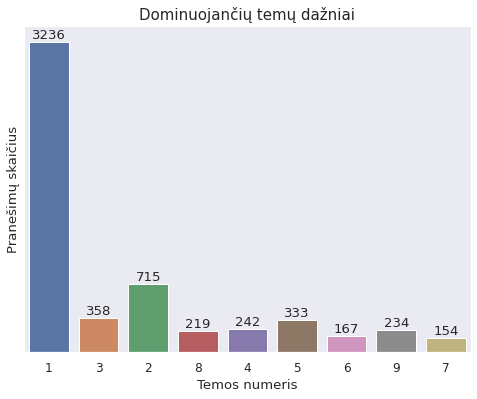

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set(font_scale = 1.1)

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_dominant_topic, x='Dominant_Topic')
plt.title('Dominuojančių temų dažniai', fontsize=15)
plt.xlabel('Temos numeris')
plt.ylabel('Pranešimų skaičius')
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.show()

In [ ]:
import textwrap
print('Top 10 most relevant tweets for each topic\n')
for doc_list in docs_per_topic:
  print(f"Topic {docs_per_topic.index(doc_list)+1}")
  for doc_index, topic_score in doc_list[:20]:
    print(f"Tweet index no.: {doc_index}\nTopic score: {topic_score}\nDate: {Zelensky.tweetcreatedts.iloc[doc_index]}\nUsermame: {Zelensky.username.iloc[doc_index]}\n")
    print(textwrap.fill(Zelensky.text.iloc[doc_index], 160) + "\n")

Top 10 most relevant tweets for each topic

Topic 1
Tweet index no.: 4838
Topic score: 0.960959255695343
Date: 2022-03-18 00:31:18.000000
Usermame: CreativitysCall

 "being the leader of the world means to be the leader of #peace" #standwithukraine &amp; its #hero president #zelenskyy. imagine the great future ahead of
humanity in a world of peace - where all peoples are governed with their consent - &amp; the full human potential yet to be unleashed

Tweet index no.: 4839
Topic score: 0.960959255695343
Date: 2022-03-18 00:32:03.000000
Usermame: CreativitysCall

"being the leader of the world means to be the leader of #peace" #standwithukraine &amp; its #hero president #zelenskyy. imagine the great future ahead of
humanity in a world of peace - where all peoples are governed with their consent - &amp; the full human potential yet to be unleashed

Tweet index no.: 3317
Topic score: 0.9540553689002991
Date: 2022-03-04 12:15:56.000000
Usermame: kimtcadwell

the #ukrainians seem to be made

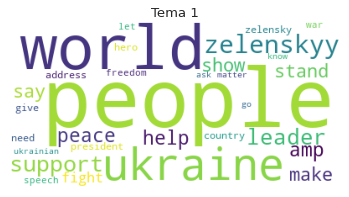

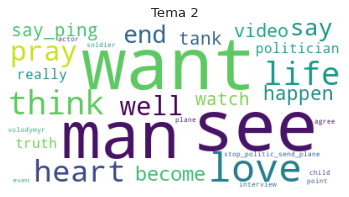

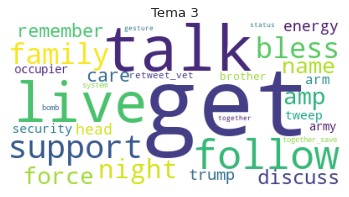

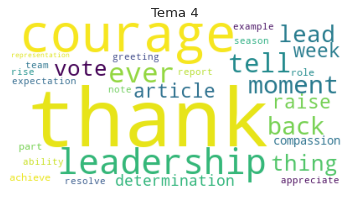

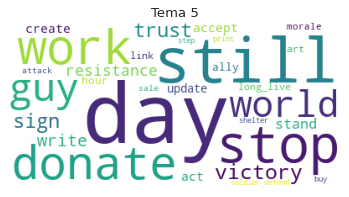

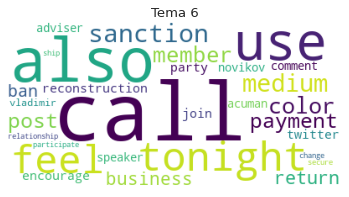

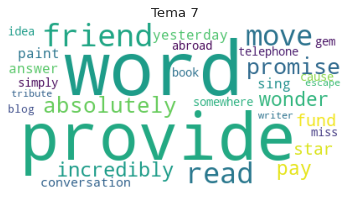

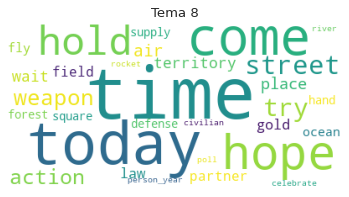

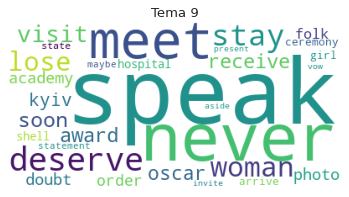

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0).fit_words(dict(lda_model.show_topic(t, 30))))
    plt.axis("off")
    plt.title("Tema " + str(t+1))
    plt.show()

In [ ]:
pyLDAvis.save_html(vis, 'lda.html')